# US Household Income Data
---

The data set below contains US household income information associated to states and cities.

Data Source 1:https://www.kaggle.com/goldenoakresearch/us-household-income-stats-geo-locations?select=kaggle_income.csv

In [2]:
#!conda install geoplot -c conda-forge
#!pip install --upgrade scikit-learn

In [2]:
# Dependencies 
import pandas as pd
import numpy as np
import os
path = os.getcwd()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

In [3]:
# Create data frame from US Household Income Statistics
df = pd.read_csv(path+'/DataSources/kaggle_income.csv',encoding="ISO-8859-1")
# Remove unwanted columns
df.drop(columns = ['id','State_Code','Primary'],inplace=True)
# Preview dataframe
df.head()

State_Name State_ab          County            City            Place  Type  \
0    Alabama       AL   Mobile County       Chickasaw   Chickasaw city  City   
1    Alabama       AL  Barbour County      Louisville        Clio city  City   
2    Alabama       AL   Shelby County      Columbiana  Columbiana city  City   
3    Alabama       AL   Mobile County         Satsuma      Creola city  City   
4    Alabama       AL   Mobile County  Dauphin Island   Dauphin Island  Town   

   Zip_Code Area_Code     ALand     AWater        Lat        Lon   Mean  \
0     36611       251  10894952     909156  30.771450 -88.079697  38773   
1     36048       334  26070325      23254  31.708516 -85.611039  37725   
2     35051       205  44835274     261034  33.191452 -86.615618  54606   
3     36572       251  36878729    2374530  30.874343 -88.009442  63919   
4     36528       251  16204185  413605152  30.250913 -88.171268  77948   

   Median  Stdev        sum_w  
0   30506  33101  1638.260513  
1   19528  43789   258.017685  
2   31930  57348   926.031000  
3   52814  47707   378.114619  
4   67225  54270   282.320328

In [4]:
# Display data structure information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32526 entries, 0 to 32525
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State_Name  32526 non-null  object 
 1   State_ab    32526 non-null  object 
 2   County      32526 non-null  object 
 3   City        32526 non-null  object 
 4   Place       32526 non-null  object 
 5   Type        32526 non-null  object 
 6   Zip_Code    32526 non-null  int64  
 7   Area_Code   32526 non-null  object 
 8   ALand       32526 non-null  int64  
 9   AWater      32526 non-null  int64  
 10  Lat         32526 non-null  float64
 11  Lon         32526 non-null  float64
 12  Mean        32526 non-null  int64  
 13  Median      32526 non-null  int64  
 14  Stdev       32526 non-null  int64  
 15  sum_w       32526 non-null  float64
dtypes: float64(3), int64(6), object(7)
memory usage: 4.0+ MB


## Mean Histogram
---

What is the average income distribution in the US?

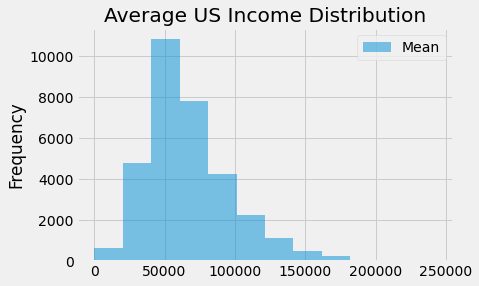

In [5]:
df[['Mean']].plot.hist(bins=12, alpha=0.5)
plt.title('Average US Income Distribution')
plt.savefig(path+'/Graphs/avg_us_income.png')
plt.show()

## Correlation Matrix
---
The matrix below is used to determine if there are any correlations between all numberical fields in the dataset

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

## Top 10 Average Income States
---

What are the top 10 average income states in the US?

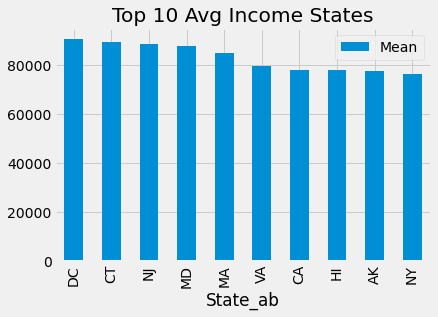

In [7]:
top_10 = df.groupby('State_ab').mean()['Mean'].to_frame().sort_values('Mean',ascending=False).head(10)
top_10.plot(kind='bar')
plt.title('Top 10 Avg Income States')
plt.savefig(path+'/Graphs/top_10_avg_income_states.png')
plt.show()

## Bottom 10 Average Income State
---
What are the bottom 10 average income states in the US?

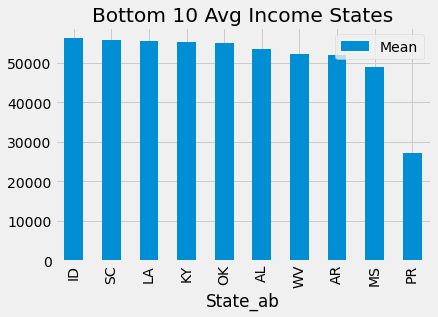

In [8]:
bot_10 = df.groupby('State_ab').mean()['Mean'].to_frame().sort_values('Mean',ascending=False).tail(10)
bot_10.plot(kind='bar')
plt.title('Bottom 10 Avg Income States')
plt.savefig(path+'/Graphs/bottom_10_avg_income_states.png')
plt.show()

# Adult Incomes in the US
---
The dataset below contains Adult income information and various attributes.

Data Source 2:https://www.kaggle.com/danielbethell/adult-incomes-in-the-united-states

In [9]:
# Create data frame from US Household Income Statistics
df2 = pd.read_csv(path+'/DataSources/adult.csv',header=None)
# Add column names; Column info provided in link above
df2.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
# Remove white space from race field
df2['race'] = df2['race'].str.strip('123.!? \n\t')
# Preview dataframe
df2.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship   race      sex  \
0        Never-married        Adm-clerical   Not-in-family  White     Male   
1   Married-civ-spouse     Exec-managerial         Husband  White     Male   
2             Divorced   Handlers-cleaners   Not-in-family  White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband  Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife  Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [10]:
# Display data structure information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Correlation Matrix

In [11]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

## Race

Using the Adult US income dataset, what is the race demographic?

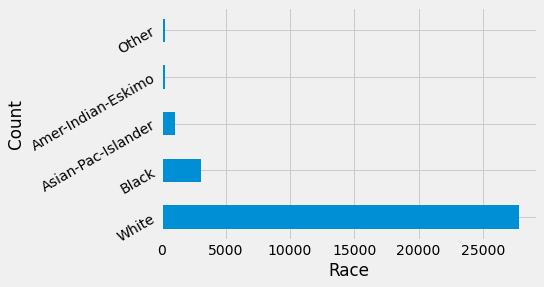

In [12]:
race = df2['race'].value_counts().plot(kind='barh',rot=30)
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()

## Education

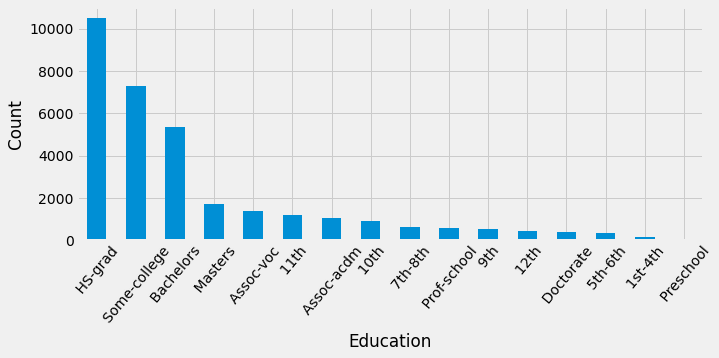

In [13]:
edu = df2['education'].value_counts().plot(kind='bar',rot=50,figsize=(10, 4))
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

## Male vs Female Comparison

What is the distribution of age and hours per week between male and female?

In [14]:
# Remove white space from the "sex" field
df2['sex'] = df2['sex'].str.strip('123.!? \n\t')

In [15]:
# Create two dataframes 
male = df2.loc[df2['sex'] == 'Male']
female = df2.loc[df2['sex'] == 'Female']

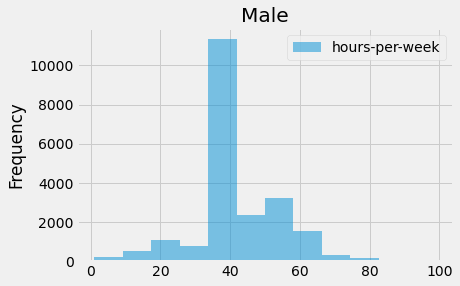

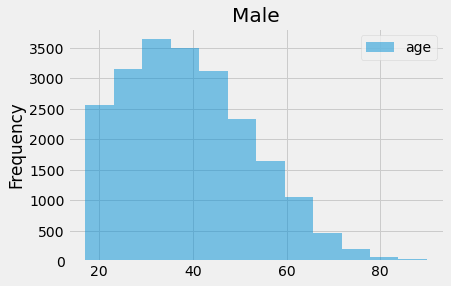

In [19]:
# Male hours per week and age distribution 
male[['hours-per-week']].plot.hist(bins=12, alpha=0.5)
plt.title('Male')
plt.savefig(path+'/Graphs/male_work_hours_distribution.png')
male[['age']].plot.hist(bins=12, alpha=0.5)
plt.title('Male')
plt.savefig(path+'/Graphs/male_age_distribution.png')
plt.show()

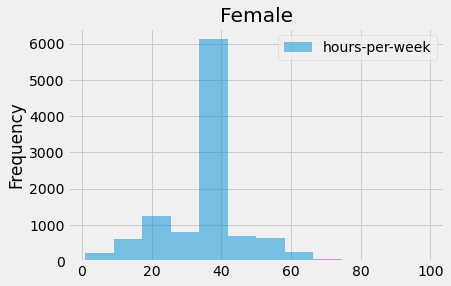

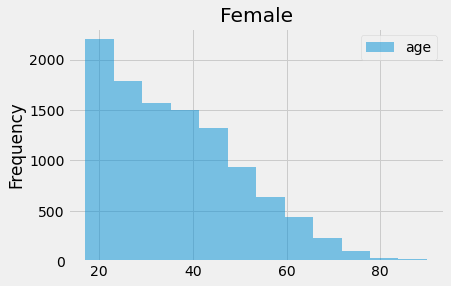

In [20]:
# Female hours per week and age distribution 
female[['hours-per-week']].plot.hist(bins=12, alpha=0.5)
plt.title('Female')
plt.savefig(path+'/Graphs/female_work_hours_distribution.png')
female[['age']].plot.hist(bins=12, alpha=0.5)
plt.title('Female')
plt.savefig(path+'/Graphs/female_age_distribution.png')
plt.show()

# Create Final Data Frame for US Household Income
---
The following two dataframes are created for the final analysis, focusing on the top and bottom average income states in the US.

In [21]:
top_10_final = df.loc[df['State_ab'].isin(['DC', 'CT', 'NJ', 'MD', 'MA', 'VA', 'CA', 'HI', 'AK', 'NY'])]
print(len(top_10_final))
top_10_final.head()

9031


State_Name State_ab                    County      City          Place  \
526     Alaska       AK      Kusilvak Census Area  Alakanuk  Alakanuk city   
527     Alaska       AK            Denali Borough  Anderson  Anderson city   
528     Alaska       AK       North Slope Borough    Barrow    Barrow city   
529     Alaska       AK  Northwest Arctic Borough  Buckland  Buckland city   
530     Alaska       AK      Kusilvak Census Area    Chevak    Chevak city   

     Type  Zip_Code Area_Code      ALand    AWater        Lat         Lon  \
526  City     99554       907   76485032  26008972  62.711160 -164.644712   
527  City     99744       907  113285111   9169124  64.308281 -149.163187   
528  City     99723       907   48786920   6890236  71.253500 -156.800072   
529  City     99727       907    3640031    417369  65.975886 -161.138732   
530  City     99563       907    2562639     54920  61.531066 -165.597199   

      Mean  Median  Stdev       sum_w  
526  40008   33347  32543  125.296256  
527  93374  300000  43837   26.531144  
528  94285   78124  70054  614.464934  
529  63175   59795  43206   68.763139  
530  51011   41718  37096  144.594291

In [22]:
bottom_10_final = df.loc[df['State_ab'].isin(['ID', 'SC', 'LA', 'KY', 'OK', 'AL', 'WV', 'AR', 'MS', 'PR'])]
print(len(bottom_10_final))
bottom_10_final.head()

3911


State_Name State_ab          County            City            Place  Type  \
0    Alabama       AL   Mobile County       Chickasaw   Chickasaw city  City   
1    Alabama       AL  Barbour County      Louisville        Clio city  City   
2    Alabama       AL   Shelby County      Columbiana  Columbiana city  City   
3    Alabama       AL   Mobile County         Satsuma      Creola city  City   
4    Alabama       AL   Mobile County  Dauphin Island   Dauphin Island  Town   

   Zip_Code Area_Code     ALand     AWater        Lat        Lon   Mean  \
0     36611       251  10894952     909156  30.771450 -88.079697  38773   
1     36048       334  26070325      23254  31.708516 -85.611039  37725   
2     35051       205  44835274     261034  33.191452 -86.615618  54606   
3     36572       251  36878729    2374530  30.874343 -88.009442  63919   
4     36528       251  16204185  413605152  30.250913 -88.171268  77948   

   Median  Stdev        sum_w  
0   30506  33101  1638.260513  
1   19528  43789   258.017685  
2   31930  57348   926.031000  
3   52814  47707   378.114619  
4   67225  54270   282.320328

In [24]:
# Convert both top/bottom 10 dataframes to csv files
top_10_final.to_csv(path+'/clean_data_files/top_10.csv',index=False)
bottom_10_final.to_csv(path+'/clean_data_files/bottom_10.csv',index=False)

# Save Adult us income dataframe as a new csv
df2.to_csv(path+'/clean_data_files/us_adult_income.csv',index=False)